In [3]:
import pandas as pd
import os
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

best_files = [
    #'../Submissions/submission_ensemble_resnet_cpl_oof_augment_minmax_median.csv',
    #'../Submissions/submission_auto_fine_tune_combined_0117.csv', #a1
    'submission_09_soft_pl_n_valid_resnet_origin_oof_augment_minmax.csv', #a2
    #'submission_nn_resnet_polar_soft_pl_n_valid_oof_augment_minmax.csv', #a3
    #'submission_dpn_lee_out_of_fold_avg_with_augmentation_40_avg.csv', #1598 not good
    #'submission_resnet_polar_cpl_oof_augment_minmax_median.csv', # wrong implementation
    #'submission_nn_resnet_polar_oof_augment_minmax.csv', # ?
    #'submission_ensemble_resnet_oof_augment_minmax_median.csv', # 0.183 for avg #not good
    #'submission_sswae_oof_augment_minmax_median.csv', #.1982 for avg #not good
    
    'others/subm_blend009_2017-10-31-07-26.csv', # least correlated
    #'others/sub.csv',# second least correlated, not good
    #'others/submission.csv', #not good
    'others/200_ens_densenet.csv', #1530 ? high corr
    'others/ens_ice_98989898989898989.csv', #1520 ? high corr
    #'others/submission_1low_test.csv', # not good
    'others/submission_1516_test.csv', #1516 (good, and low corr)
    'others/LB1541_final_ensemble.csv', #1541 public lb (good, and low corr)
    'others/vggbnw_fcn_en_ordered.csv', #1400 very good, ok corr
    'others/caesarcommodusIsBack.csv',
    'others/averagBest4.csv',
    'blend_minimax_median.csv',
    '../Submissions/submission_ensemble_contrast_resnet_top3_oof_augment_avg.csv'
    #'others/',
    #'others/',
]
'''
train = pd.read_csv('others/LB1541_final_ensemble.csv')
test = pd.read_csv('others/vggbnw_fcn_en.csv')

new_df = pd.DataFrame()
ids = train.id.values
ans = []

for i in range(test.shape[0]):
    ans.append(test.loc[test.id==ids[i],'is_iceberg'].reset_index(drop=True)[0])
    
new_df['id'] = ids
new_df['is_iceberg'] = ans
print(new_df.head(10))  
new_df.to_csv('others/vggbnw_fcn_en_ordered.csv', index=False)
'''
file_num = len(best_files)

In [4]:
outs = [pd.read_csv(f, index_col=0) for f in best_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "is_iceberg_" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head(5)

id  is_iceberg_0  is_iceberg_1  is_iceberg_2  is_iceberg_3  \
0  5941774d      0.006182      0.094676  1.943216e-02      0.022661   
1  4023181e      0.249994      0.952222  3.168809e-02      0.281293   
2  b20200e4      0.000003      0.167771  4.000000e-08      0.065910   
3  e7f018bb      0.999321      0.989356  9.925741e-01      0.995712   
4  4371c8c3      0.001795      0.900321  2.215107e-02      0.042113   

   is_iceberg_4  is_iceberg_5  is_iceberg_6  is_iceberg_7  is_iceberg_8  \
0      0.015196      0.006448      0.030369      0.001653      0.001378   
1      0.939407      0.758083      0.364333      0.399378      0.374268   
2      0.040264      0.041054      0.017298      0.000002      0.000004   
3      0.999260      0.996372      0.998199      0.999362      0.999454   
4      0.828124      0.007940      0.657598      0.039118      0.039618   

   is_iceberg_9  is_iceberg_10  
0  6.181784e-03       0.006990  
1  3.643330e-01            NaN  
2  4.000000e-08            NaN  
3  9.993215e-01       0.976659  
4  4.211275e-02            NaN

In [5]:
ids = pd.read_csv('real ids.csv')

mask = concat_sub.id.isin(ids.id.tolist())
concat_sub = concat_sub.loc[mask,:].reset_index(drop=True)
print('File Shape: ', concat_sub.shape)
print(concat_sub.head(5))

File Shape:  (3425, 12)
         id  is_iceberg_0  is_iceberg_1  is_iceberg_2  is_iceberg_3  \
0  5941774d      0.006182      0.094676      0.019432      0.022661   
1  e7f018bb      0.999321      0.989356      0.992574      0.995712   
2  29e7727e      0.023397      0.004942      0.370138      0.277460   
3  92a51ffb      0.999117      0.997785      0.996215      0.998744   
4  c769ac97      0.001959      0.002571      0.000266      0.000038   

   is_iceberg_4  is_iceberg_5  is_iceberg_6  is_iceberg_7  is_iceberg_8  \
0      0.015196      0.006448      0.030369      0.001653      0.001378   
1      0.999260      0.996372      0.998199      0.999362      0.999454   
2      0.057872      0.022970      0.022536      0.031446      0.046701   
3      0.999640      0.997679      0.998681      0.999675      0.999727   
4      0.000258      0.000007      0.001470      0.000006      0.000005   

   is_iceberg_9  is_iceberg_10  
0      0.006182       0.006990  
1      0.999321       0.976659  

In [6]:
for f in best_files:
    print(f)

concat_sub.corr()

submission_09_soft_pl_n_valid_resnet_origin_oof_augment_minmax.csv
others/subm_blend009_2017-10-31-07-26.csv
others/200_ens_densenet.csv
others/ens_ice_98989898989898989.csv
others/submission_1516_test.csv
others/LB1541_final_ensemble.csv
others/vggbnw_fcn_en_ordered.csv
others/caesarcommodusIsBack.csv
others/averagBest4.csv
blend_minimax_median.csv
../Submissions/submission_ensemble_contrast_resnet_top3_oof_augment_avg.csv


is_iceberg_0  is_iceberg_1  is_iceberg_2  is_iceberg_3  \
is_iceberg_0       1.000000      0.917880      0.966030      0.968648   
is_iceberg_1       0.917880      1.000000      0.923222      0.933943   
is_iceberg_2       0.966030      0.923222      1.000000      0.988753   
is_iceberg_3       0.968648      0.933943      0.988753      1.000000   
is_iceberg_4       0.918848      0.894610      0.921532      0.940139   
is_iceberg_5       0.934296      0.898140      0.936232      0.954846   
is_iceberg_6       0.958406      0.911258      0.953073      0.967263   
is_iceberg_7       0.978320      0.940619      0.975928      0.983396   
is_iceberg_8       0.981169      0.941608      0.979178      0.985699   
is_iceberg_9       0.980546      0.939634      0.979740      0.987537   
is_iceberg_10      0.958741      0.883217      0.946707      0.951228   

               is_iceberg_4  is_iceberg_5  is_iceberg_6  is_iceberg_7  \
is_iceberg_0       0.918848      0.934296      0.958406      0.978320   
is_iceberg_1       0.894610      0.898140      0.911258      0.940619   
is_iceberg_2       0.921532      0.936232      0.953073      0.975928   
is_iceberg_3       0.940139      0.954846      0.967263      0.983396   
is_iceberg_4       1.000000      0.964190      0.938029      0.951125   
is_iceberg_5       0.964190      1.000000      0.953334      0.966509   
is_iceberg_6       0.938029      0.953334      1.000000      0.974918   
is_iceberg_7       0.951125      0.966509      0.974918      1.000000   
is_iceberg_8       0.950087      0.965166      0.975676      0.999681   
is_iceberg_9       0.953225      0.968436      0.979358      0.995958   
is_iceberg_10      0.896400      0.915011      0.947647      0.948491   

               is_iceberg_8  is_iceberg_9  is_iceberg_10  
is_iceberg_0       0.981169      0.980546       0.958741  
is_iceberg_1       0.941608      0.939634       0.883217  
is_iceberg_2       0.979178      0.979740       0.946707  
is_iceberg_3       0.985699      0.987537       0.951228  
is_iceberg_4       0.950087      0.953225       0.896400  
is_iceberg_5       0.965166      0.968436       0.915011  
is_iceberg_6       0.975676      0.979358       0.947647  
is_iceberg_7       0.999681      0.995958       0.948491  
is_iceberg_8       1.000000      0.996722       0.951821  
is_iceberg_9       0.996722      1.000000       0.956181  
is_iceberg_10      0.951821      0.956181       1.000000

In [7]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.67
cutoff_hi = 0.33

In [6]:
import numpy as np
from scipy.stats import trim_mean, gmean

# get the data fields ready for stacking
print('Using columns: ', concat_sub.iloc[:, 1:file_num+1].columns.tolist())
concat_sub['is_iceberg_max'] = concat_sub.iloc[:, 1:file_num+1].max(axis=1)
concat_sub['is_iceberg_min'] = concat_sub.iloc[:, 1:file_num+1].min(axis=1)
concat_sub['is_iceberg_mean'] = concat_sub.iloc[:, 1:file_num+1].mean(axis=1)
concat_sub['is_iceberg_median'] = concat_sub.iloc[:, 1:file_num+1].median(axis=1)
concat_sub['25_percentile'] = np.percentile(concat_sub.iloc[:, 1:file_num+1], 25, axis=1, keepdims=True)
concat_sub['75_percentile'] = np.percentile(concat_sub.iloc[:, 1:file_num+1], 75, axis=1, keepdims=True)
concat_sub['trim_mean_01'] = trim_mean(concat_sub.iloc[:, 2:file_num+1], 0.1, axis=1) # except best file
concat_sub['trim_mean_02'] = trim_mean(concat_sub.iloc[:, 2:file_num+1], 0.2, axis=1) # except best file
concat_sub['is_iceberg_gmean'] = gmean(concat_sub.iloc[:, 1:file_num+1], axis=1)

Using columns:  ['is_iceberg_0', 'is_iceberg_1', 'is_iceberg_2', 'is_iceberg_3', 'is_iceberg_4', 'is_iceberg_5', 'is_iceberg_6']


C:\Users\khyeh\Anaconda3\lib\site-packages\scipy\stats\stats.py:305: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [7]:
conflit_mask = (concat_sub['is_iceberg_max'] >= .5) & (concat_sub['is_iceberg_min'] < .5)
conflict_ans = concat_sub.loc[conflit_mask]
print(conflict_ans.shape)

(553, 17)


In [8]:
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:file_num+1] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], # all > lo
                                    np.where(np.all(concat_sub.iloc[:,1:file_num+1] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], # all < hi 
                                             concat_sub['is_iceberg_median'] # use the best
                                            )
                                   )

In [9]:
print(concat_sub[conflit_mask].shape)
conflict_ids = concat_sub[conflit_mask].id

(553, 18)


In [10]:
conflict_df = concat_sub[conflit_mask].reset_index(drop=True)
save_cols = ['id', 'is_iceberg_min', 'is_iceberg_max', 'is_iceberg']
save_cols.extend(['is_iceberg_' + str(i) for i in range(file_num)])

conflict_df[save_cols].to_csv('statistics.csv', index=False)
print('Saved columns: ', save_cols)

Saved columns:  ['id', 'is_iceberg_min', 'is_iceberg_max', 'is_iceberg', 'is_iceberg_0', 'is_iceberg_1', 'is_iceberg_2', 'is_iceberg_3', 'is_iceberg_4', 'is_iceberg_5', 'is_iceberg_6']


# Generate samples for conflicting images

In [ ]:
test = pd.read_json('../Data/test.json')

(670, 4)
Total rounds (floored):  22


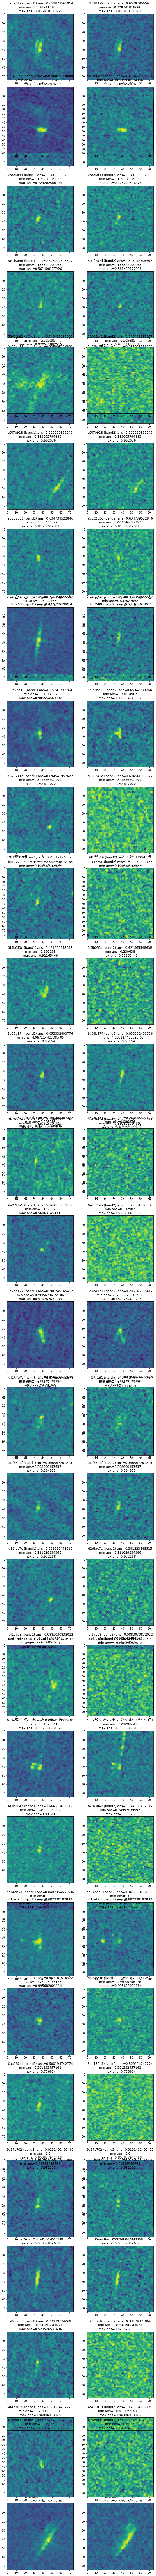

In [43]:
check_mask = test.id.isin(conflict_ids)
check_df = test[check_mask].reset_index(drop=True)
print(check_df.shape)

import matplotlib.pyplot as plt
%matplotlib inline

show_num_per_round = 30
total_rounds = check_df.shape[0] // 30

print('Total rounds (floored): ', total_rounds)

for r in range(total_rounds+1):

    if r != total_rounds:
        show_num = show_num_per_round
    else:
        show_num = check_df.shape[0] - show_num_per_round*total_rounds
    #print(show_num)
    offset = r * show_num_per_round
    
    fig = plt.figure(1,figsize=(10,show_num*6))
    for i in range(offset, offset+show_num):

        id_1 = check_df.loc[i, 'id']
        id_2 = conflict_df.loc[i, 'id']
        answer = conflict_df.loc[i, 'is_iceberg']
        min_ans = conflict_df.loc[i, 'is_iceberg_min']
        max_ans = conflict_df.loc[i, 'is_iceberg_max']
        img_1 = check_df.loc[i,'band_1']
        img_2 = check_df.loc[i,'band_2']

        ax1 = fig.add_subplot(show_num,2,2*(i-offset)+1)
        arr = np.reshape(np.array(img_1),(75,75))
        ax1.imshow(arr)
        ax1.set_title(id_1 + ' (band1) ans=' + str(answer) + '\nmin ans=' + str(min_ans) + '\nmax ans=' + str(max_ans))

        ax2 = fig.add_subplot(show_num,2,2*(i-offset)+2)
        arr = np.reshape(np.array(img_2),(75,75))
        ax2.imshow(arr)
        ax2.set_title(id_2 + ' (band2) ans=' + str(answer) + '\nmin ans=' + str(min_ans) + '\nmax ans=' + str(max_ans))

    fig.savefig('imgs/conflict/round_' + str(r) + '.png') 

In [44]:
train = pd.read_json('../Data/train.json')
print(train.shape)


show_num_per_round = 30
total_rounds = train.shape[0] // 30

print('Total rounds (floored): ', total_rounds)

for r in range(total_rounds+1):

    if r != total_rounds:
        show_num = show_num_per_round
    else:
        show_num = train.shape[0] - show_num_per_round*total_rounds
    #print(show_num)
    offset = r * show_num_per_round
    
    fig = plt.figure(1,figsize=(10,show_num*6))
    for i in range(offset, offset+show_num):

        answer = train.loc[i, 'is_iceberg']
        img_1 = train.loc[i,'band_1']
        img_2 = train.loc[i,'band_2']

        ax1 = fig.add_subplot(show_num,2,2*(i-offset)+1)
        arr = np.reshape(np.array(img_1),(75,75))
        ax1.imshow(arr)
        ax1.set_title(id_1 + ' (band1) ans=' + str(answer))

        ax2 = fig.add_subplot(show_num,2,2*(i-offset)+2)
        arr = np.reshape(np.array(img_2),(75,75))
        ax2.imshow(arr)
        ax2.set_title(id_2 + ' (band2) ans=' + str(answer))

    fig.savefig('imgs/train/round_' + str(r) + '.png') 

(1604, 5)
Total rounds (floored):  53
